In [267]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

td = pd.read_csv("cov.csv")

In [268]:
td = td.drop(td.columns[0], axis=1)

In [269]:
td.loc[td["score"] < 0.50, "category"] = "Normal"

In [270]:
td.isnull().sum()

joined                  0
username                0
name                    4
category             5033
score                   2
tweets                  0
following               0
followers               0
likes                   0
user_id             11095
date_added          11095
status              11095
verified                0
geo_enabled             0
suspended               0
profile_location    24862
listed_count            0
Unnamed: 17         28982
dtype: int64

In [271]:
td.dropna(subset = ['category'], inplace = True)

In [272]:
td.isnull().sum()

joined                  0
username                0
name                    2
category                0
score                   0
tweets                  0
following               0
followers               0
likes                   0
user_id             11095
date_added          11095
status              11095
verified                0
geo_enabled             0
suspended               0
profile_location    20188
listed_count            0
Unnamed: 17         23949
dtype: int64

In [273]:
td.head()

,joined,username,name,category,score,tweets,following,followers,likes,user_id,date_added,status,verified,geo_enabled,suspended,profile_location,listed_count,Unnamed: 17
0,2019-10-01 00:00:00,JoLynnBlake13,"The hammer of Truth, Justice & the American Way!",Trollbot,0.81,24113,7514,7334,10,NaN,NaN,NaN,False,False,True,NaN,0,NaN
1,2018-09-01 00:00:00,BreLa1212,Bre-la,Trollbot,0.80,7145,126,54,9749,NaN,NaN,NaN,False,False,False,"Hawaii, USA",5,NaN
2,2015-02-01 00:00:00,NotMattrellen,Probably Not Mattrellen,Trollbot,0.87,667,113,65,2214,NaN,NaN,NaN,False,False,False,NaN,0,NaN
3,2018-05-01 00:00:00,lizthemomager,Aiabeth,Trollbot,0.77,2657,739,448,743,NaN,NaN,NaN,False,False,True,NaN,0,NaN
4,2011-03-01 00:00:00,ipmedic,Jeff Long,Trollbot,0.80,2795,4734,3540,10111,NaN,NaN,NaN,False,True,False,NaN,4,NaN


In [274]:
td.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25942 entries, 0 to 30974
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   joined            25942 non-null  object 
 1   username          25942 non-null  object 
 2   name              25940 non-null  object 
 3   category          25942 non-null  object 
 4   score             25942 non-null  float64
 5   tweets            25942 non-null  int64  
 6   following         25942 non-null  int64  
 7   followers         25942 non-null  int64  
 8   likes             25942 non-null  int64  
 9   user_id           14847 non-null  float64
 10  date_added        14847 non-null  object 
 11  status            14847 non-null  object 
 12  verified          25942 non-null  object 
 13  geo_enabled       25942 non-null  object 
 14  suspended         25942 non-null  bool   
 15  profile_location  5754 non-null   object 
 16  listed_count      25942 non-null  object

In [275]:

td.loc[td["category"] == "Trollbot", "category"] = 1
td.loc[td["category"] == "Normal", "category"] = 0

In [276]:
td.loc[td["verified"] == "False", "verified"] = 0
td.loc[td["verified"] == "True", "verified"] = 1
td.loc[td["geo_enabled"] == "False", "geo_enabled"] = 0
td.loc[td["geo_enabled"] == "True", "geo_enabled"] = 1

In [277]:
td.loc[td["suspended"] == False, "suspended"] = 0
td.loc[td["suspended"] == True, "suspended"] = 1

In [278]:
td.head()

,joined,username,name,category,score,tweets,following,followers,likes,user_id,date_added,status,verified,geo_enabled,suspended,profile_location,listed_count,Unnamed: 17
0,2019-10-01 00:00:00,JoLynnBlake13,"The hammer of Truth, Justice & the American Way!",1,0.81,24113,7514,7334,10,NaN,NaN,NaN,0,0,1,NaN,0,NaN
1,2018-09-01 00:00:00,BreLa1212,Bre-la,1,0.80,7145,126,54,9749,NaN,NaN,NaN,0,0,0,"Hawaii, USA",5,NaN
2,2015-02-01 00:00:00,NotMattrellen,Probably Not Mattrellen,1,0.87,667,113,65,2214,NaN,NaN,NaN,0,0,0,NaN,0,NaN
3,2018-05-01 00:00:00,lizthemomager,Aiabeth,1,0.77,2657,739,448,743,NaN,NaN,NaN,0,0,1,NaN,0,NaN
4,2011-03-01 00:00:00,ipmedic,Jeff Long,1,0.80,2795,4734,3540,10111,NaN,NaN,NaN,0,1,0,NaN,4,NaN


In [279]:
td2 = td.filter(['category', 'tweets', 'following', 'followers', 'likes'], axis = 1)

In [280]:
y = td2['category']
x = td2.drop(['category'], axis=1)
y = y.astype('int')

In [281]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 101, stratify = y, test_size = 0.3)

In [282]:
y_train.value_counts(normalize = True)

0    0.612534
1    0.387466
Name: category, dtype: float64

***DYNAMIC TREE MODEL***


In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

In [284]:
dt_model = DecisionTreeClassifier(random_state = 10)

In [285]:
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=10)

In [286]:
dt_model.score(x_test, y_test)

0.6201978671463446

USING DIFFERENT PARAMETERS TO INCREASE ACCURACY


In [288]:
train_acc = []
test_acc = []
# changing max depth 
for depth in range(1,10):
  dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 10)
  dt_model.fit(x_train, y_train)
  train_acc.append(dt_model.score(x_train, y_train))
  test_acc.append(dt_model.score(x_test, y_test))



In [292]:
df = pd.DataFrame({'max_depth': range(1,10), 'train_acc': train_acc, 'test_acc': test_acc})

No handles with labels found to put in legend.


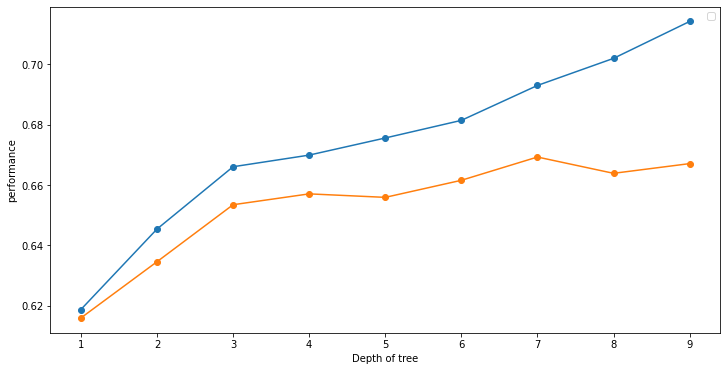

In [294]:
plt.figure(figsize = (12,6))
plt.plot(df['max_depth'], df['train_acc'], marker = 'o')
plt.plot(df['max_depth'], df['test_acc'], marker = 'o')
plt.xlabel('Depth of tree')
plt.ylabel('performance')
plt.legend()

In [310]:
dt_model = DecisionTreeClassifier(max_depth = 15, max_leaf_nodes = 25, random_state = 4)
dt_model.fit(x_train, y_train)
dt_model.score(x_train, y_train)

0.6784514565780054